# Association Between Categorical Variables

A standard approach for testing the independence/dependence of a pair of categorical variables is to use a $\chi^2$ (Chi-square) test of independence. 

The null and alternative hypotheses for the $\chi^2$ test are as follows:

* $H_0$: the two categorical variables are independent
* $H_A$: the two categorical variables are dependent

## Contingency tables of observed counts

We typically depict the relationship between categorical variables using a "contingency table".

|       | B1                  | B2                  | Total                               |
|-------|---------------------|---------------------|-------------------------------------|
| A1    | $O_{11}$            | $O_{12}$            | $O_{11}$+$O_{12}$                   |
| A2    | $O_{21}$            | $O_{22}$            | $O_{12}$+$O_{22}$                   |
| Total | $O_{11}$+$O_{21}$   | $O_{12}$+$O_{22}$   | $O_{11}$+$O_{12}$+$O_{12}$+$O_{22}$ |

The rows and columns indicate the different categories for variables A and B respectively, and the cells, $O_{ij}$, give the counts of the number of observations for the corresponding combination of A and B.  For example, the cell $O_{11}$ gives the number of observations that that belong to both the category A1 and B1, while $O_{12}$ gives the number that are both A1 and B2, etc.

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [9]:
# load the bumpus dat set
dataurl = "https://github.com/Bio204-class/bio204-datasets/raw/master/bumpus-data.txt"
bumpus = pd.read_table(dataurl)

# for clarity of presentation let's replace the sex designation "m","f" with "male","female"
bumpus.sex.replace(dict(m="male", f="female"), inplace=True)

# similarly replace survived variables"F","T" with "False" and "True"
bumpus.survived.replace(dict(F=False, T=True), inplace=True)


In [22]:
# Construct a contingency table for the sex and survival categorical variables.
# The pandas.crosstab function will create the contingency table
# if margins = True, will including row, column, and overall sums in table
# if margins = False only includes the the joint counts
observed = pd.crosstab(bumpus.survived, bumpus.sex, margins=True)

print("Table of observed counts")
observed

Table of observed counts


sex,female,male,All
survived,,,
False,28,36,64
True,21,51,72
All,49,87,136


In [82]:
np.sum(bumpus.sex == "female"), np.sum(bumpus.sex == "male")

(49, 87)

## Expected counts

If the two categorical variables were independent than we would expect that the count in each cell of the contigency table to equal the product of the marginal probalities times the total number of observations.

In [12]:
nobs = observed.ix['All','All']

prob_female = observed.ix['All','female']/nobs
prob_male = observed.ix['All', 'male']/nobs

prob_surv = observed.ix[True, 'All']/nobs
prob_died = observed.ix[False, 'All']/nobs

expected_counts = []
for i in (prob_died, prob_surv):
    row = []
    for j in (prob_female, prob_male):
        row.append(i * j * nobs)
    expected_counts.append(row + [np.sum(row)])
expected_counts.append(np.sum(expected_counts,axis=0).tolist())

expected = pd.DataFrame(expected_counts, index=observed.index, columns=observed.columns)

print("Table of Expected Counts")
expected

Table of Expected Counts


sex,female,male,All
survived,,,
False,23.058824,40.941176,64
True,25.941176,46.058824,72
All,49.000000,87.000000,136


## Difference between Observed and Expected counts
Since the  margins of the table (the row and column labeled "All") are the same for both the observed and expected counts, let's work with just the inner cells of the table.

In [18]:
Observed = observed.ix[:-1, :-1]  # take all but the last row and colum 
Expected = expected.ix[:-1, :-1]  # as above

In [51]:
# This code cell just shows how you can do some fancy HTML output
# from Jupyter code cells.  Here I wanted to output both observed and expected
# count tables in the same cell with some nicely formatted headers.
# This is purely for presentation, we're not doing an analysis here.

from IPython.display import display, HTML

def fmt(x):
    return "{:04.2f}".format(x)

Obs_as_html = Observed.to_html(float_format=fmt)
Exp_as_html = Expected.to_html(float_format=fmt)

HTML("<h3>Observed Counts</h3>\n\n" + Obs_as_html + "\n\n" +
     "<h3>Expected Counts</h3>\n\n" + Exp_as_html)

sex,female,male
survived,,
False,28,36
True,21,51
sex,female,male
survived,,
False,23.06,40.94
True,25.94,46.06


We can quantify the difference between the observed counts and expected counts on a per cell basis using something which is essentially a squared deviation (but for counts rather than values of a random variate) normalized by the expectation.

In [57]:
diff_squared = (Observed-Expected)**2/Expected
diff_squared

sex,female,male
survived,,
False,1.058824,0.596349
True,0.941176,0.530088


## The $\chi^2$-statistic

We can calculate a new test statistic, we'll call $\chi^2$ (chi-squared), as the sum of

\begin{align}
\chi^2 &= \frac{(O_{11} - E_{11})^2}{E_{11}} + \frac{(O_{12} - E_{12})^2}{E_{12}} + \cdots + \frac{(O_{mn} - E_{mn})^2}{E_{mn}} \\
\\
&= \sum_{i=1}^{m}\sum_{j=1}^{n} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
\end{align}

where $m$ and $n$ are the number of categories of the two variables under consideration.

In [60]:
# cast to matrix so we can calculate sum across all cells
chi2 = np.sum(diff_squared.as_matrix())  

print("Chi-squared", chi2)

Chi-squared 3.12643678161


We can think of the $\chi^2$-statistic as the sum of the normalized squared differences between observed and expected counts (where each cell is normalized by the expected counts).


## The $\chi^2$-distribution

Under the null hypothesis that the categorical variables are independent the $\chi^2$-statistic has a sampling distribution called the $\chi^2$-distribution.  The $\chi^2$-distribution takes a single parameter, degree of freedom (df), which for the $\chi^2$ test of independence is equal to $(m-1)(n-1)$ where $m$ and $n$ are the number of categories in the two variables.


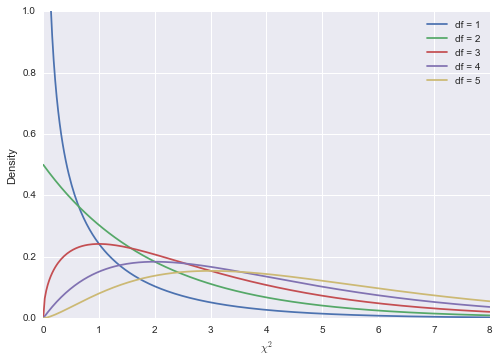

In [72]:
x = np.linspace(0,8,300)

chi2_df1_pdf = stats.chi2.pdf(x, df=1) 
chi2_df2_pdf = stats.chi2.pdf(x, df=2)
chi2_df3_pdf = stats.chi2.pdf(x, df=3)
chi2_df4_pdf = stats.chi2.pdf(x, df=4)
chi2_df5_pdf = stats.chi2.pdf(x, df=5)

plt.plot(x, chi2_df1_pdf, label="df = 1")
plt.plot(x, chi2_df2_pdf, label="df = 2")
plt.plot(x, chi2_df3_pdf, label="df = 3")
plt.plot(x, chi2_df4_pdf, label="df = 4")
plt.plot(x, chi2_df5_pdf, label="df = 5")

plt.xlabel('$\chi^2$')
plt.ylabel('Density')
plt.ylim(0,1)  # note this will cut off the curve for df=1
plt.legend()
pass

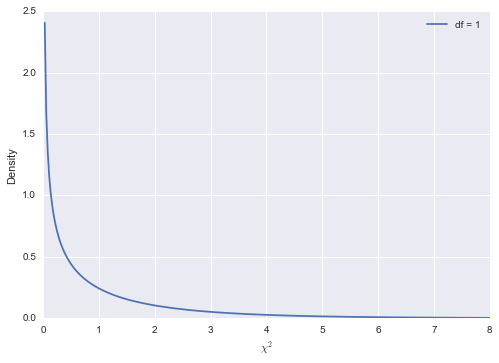

In [79]:
x = np.linspace(0,8,300)

chi2_df1_pdf = stats.chi2.pdf(x, df=1) 
chi2_df2_pdf = stats.chi2.pdf(x, df=2)
chi2_df3_pdf = stats.chi2.pdf(x, df=3)
chi2_df4_pdf = stats.chi2.pdf(x, df=4)
chi2_df5_pdf = stats.chi2.pdf(x, df=5)

plt.plot(x, chi2_df1_pdf, label="df = 1")


plt.xlabel('$\chi^2$')
plt.ylabel('Density')
plt.legend()
pass

For our bumpus example, the degrees of freedom is df=1. We can calculate the corresponding p-value for our sample chi2 value of ~3.13.

In [75]:
stats.chi2.sf(chi2, df=1)

0.077031938117561066

### $X^2$-square test of independence using scipy.stats

In [76]:
# Same analysis with scipy.stats fxns
observed_nomargin = pd.crosstab(bumpus.survived, bumpus.sex, margins=False)
Chi2, Pval, Dof, Expected = stats.chi2_contingency(observed_nomargin.values, 
                                                   correction=False)

In [78]:
Chi2, Pval, Dof

(3.1264367816091938, 0.077031938117561066, 1)